✅ Config loaded. Data file path: d:\Somali-Disease-Detection\data\somali_synthetic_diseases.csv
✅ Directories checked/created.
Looking for data at: d:\Somali-Disease-Detection\data\somali_synthetic_diseases.csv
File exists: True
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          340 non-null    int64  
 1   temperature  340 non-null    float64
 2   headache     340 non-null    int64  
 3   cough        340 non-null    int64  
 4   vomiting     340 non-null    int64  
 5   diarrhea     340 non-null    int64  
 6   fatigue      340 non-null    int64  
 7   rash         340 non-null    int64  
 8   bleeding     340 non-null    int64  
 9   anaemia      340 non-null    int64  
 10  disease      340 non-null    object 
dtypes: float64(1), int64(9), object(1)
memory usage: 29.3+ KB
None

First 5 rows:
   age  temperature  he

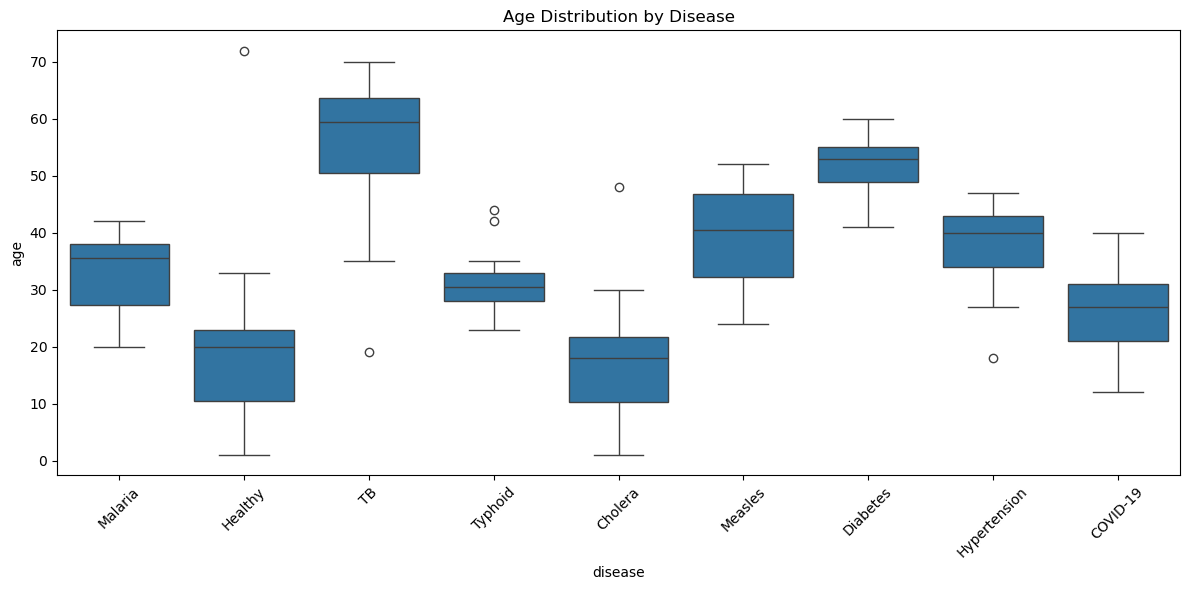

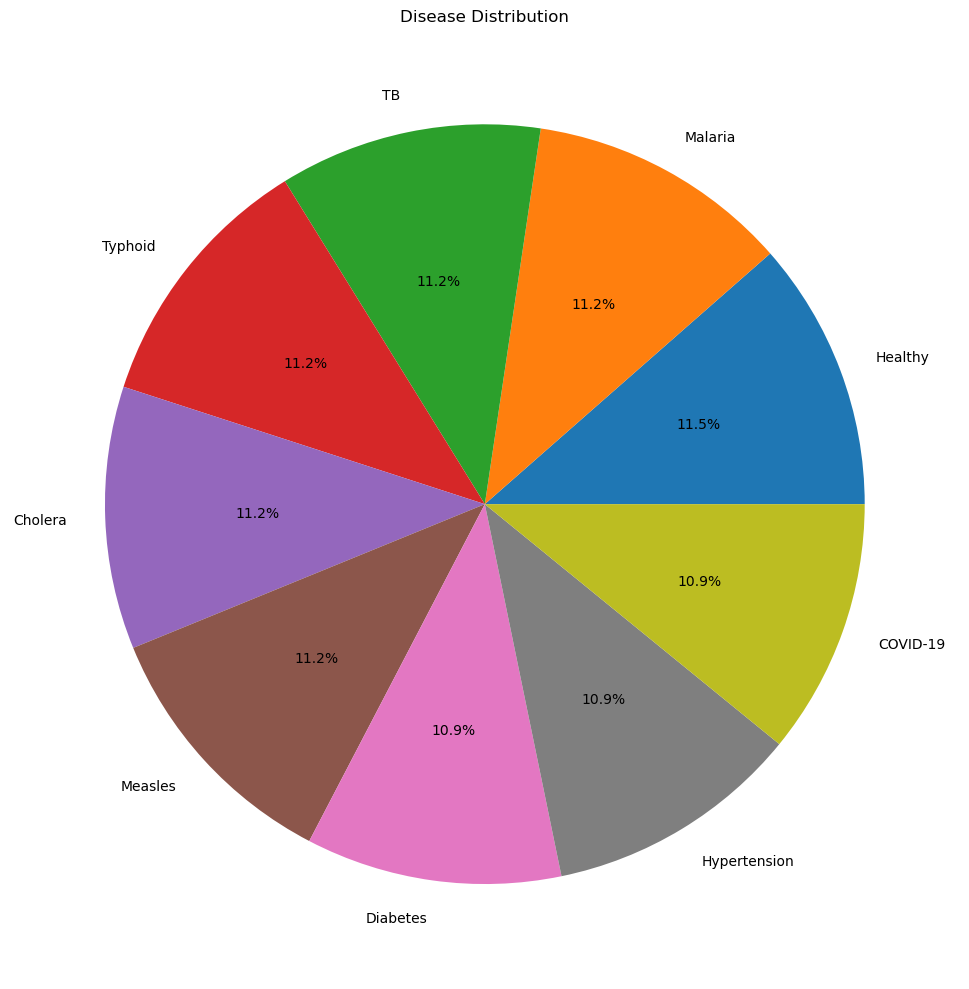

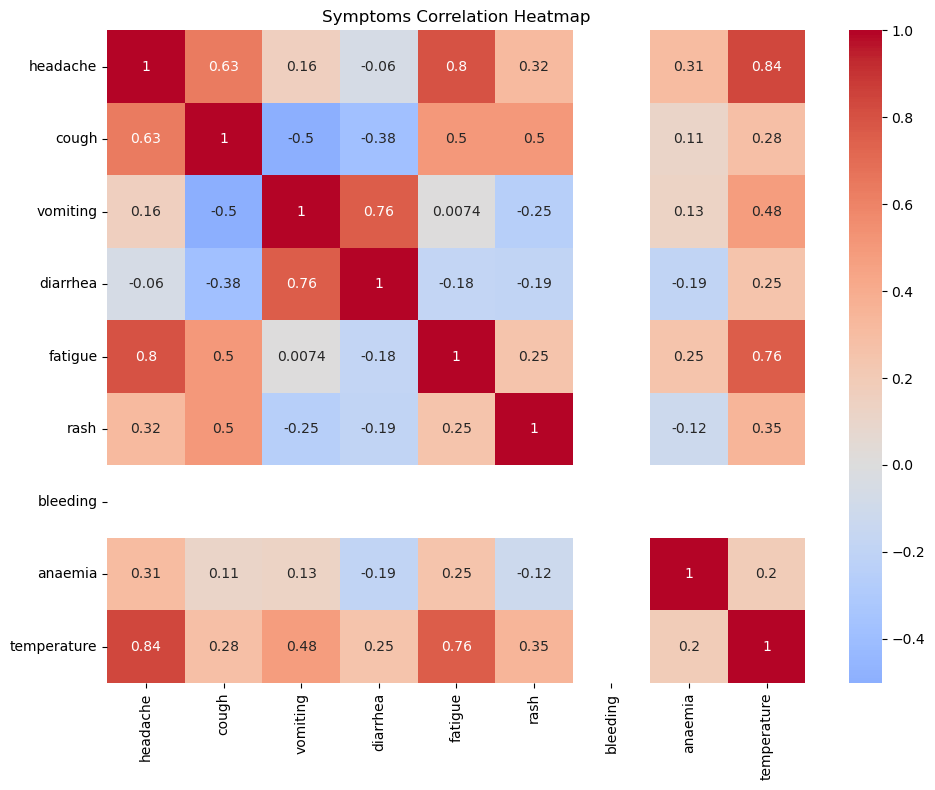

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
import sys

# Get the current notebook directory
notebook_dir = Path().absolute()
project_root = notebook_dir.parent  # Go up one level from notebooks/

# Add project root to path
sys.path.append(str(project_root))

# Now try to import config
try:
    from config import DATA_FILE
except ImportError:
    # If config doesn't exist, create it dynamically
    DATA_FILE = project_root / "data" / "somali_synthetic_diseases.csv"
    print(f"Config not found, using default path: {DATA_FILE}")

# Alternative direct approach - use path directly:
# DATA_FILE = Path.cwd().parent / "data" / "somali_synthetic_diseases.csv"

# Load data
print(f"Looking for data at: {DATA_FILE}")
print(f"File exists: {DATA_FILE.exists()}")

df = pd.read_csv(DATA_FILE)
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nDisease distribution:")
print(df['disease'].value_counts())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Statistical summary
print("\nStatistical summary:")
print(df.describe())

# Age distribution by disease
plt.figure(figsize=(12, 6))
sns.boxplot(x='disease', y='age', data=df)
plt.xticks(rotation=45)
plt.title('Age Distribution by Disease')
plt.tight_layout()
plt.savefig('../data/age_distribution.png')

# Disease distribution pie chart
plt.figure(figsize=(10, 10))
df['disease'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Disease Distribution')
plt.ylabel('')
plt.tight_layout()
plt.savefig('../data/disease_distribution.png')

# Symptoms correlation heatmap
symptoms = ['headache', 'cough', 'vomiting', 'diarrhea', 'fatigue', 'rash', 'bleeding', 'anaemia']
plt.figure(figsize=(10, 8))
sns.heatmap(df[symptoms + ['temperature']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Symptoms Correlation Heatmap')
plt.tight_layout()
plt.savefig('../data/symptoms_correlation.png')

print("\n✅ All charts saved successfully!")